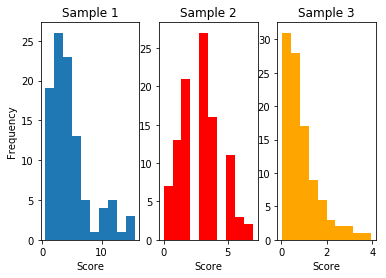


Sample 1 is not normally distributed.
NormaltestResult(statistic=28.852320405171508, pvalue=5.429979987373983e-07)

Sample 2 is normally distributed.
NormaltestResult(statistic=1.1682879925702732, pvalue=0.5575829506652406)

Sample 3 is not normally distributed.
NormaltestResult(statistic=35.336419205989685, pvalue=2.1222378911585247e-08)


,sample_1,sample_2,sample_3
0,1.555405,4.0,0.147010
1,2.635448,2.0,1.002484
2,3.528070,4.0,0.048837
3,1.559597,3.0,0.041870
4,5.423708,2.0,0.301760


,sample_1_ranks,sample_2_ranks,sample_3_ranks
0,2.0,3.0,1.0
1,3.0,2.0,1.0
2,2.0,3.0,1.0
3,2.0,3.0,1.0
4,3.0,2.0,1.0



Manually calculated Friedman test results:
('Friedman X**2 = ', 106.01999999999998, 'p =', 0.0)

Friedman test results calculated with scipy.stats:
FriedmanchisquareResult(statistic=106.01999999999998, pvalue=9.50713179151283e-24)


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# creating non-normal data, randomly determining which will have the larger mean rank

sample_size = 100

distributions = [np.random.chisquare(df = 5, size = sample_size), 
                 np.random.poisson(lam = 3, size = sample_size),
                np.random.gamma(shape =1, scale = 1, size = sample_size)]

distributions = np.random.permutation(distributions)

sample_1_outcome = distributions[0]
sample_2_outcome = distributions[1]
sample_3_outcome = distributions[2]

# plotting the data

fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.hist(sample_1_outcome)
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')
ax.set_title('Sample 1')

ax2 = fig.add_subplot(1,3,2)
ax2.hist(sample_2_outcome, color = 'red')
ax2.set_xlabel('Score')
ax2.set_title('Sample 2')


ax3 = fig.add_subplot(1,3,3)
ax3.hist(sample_3_outcome, color = 'orange')
ax3.set_xlabel('Score')
ax3.set_title('Sample 3')
plt.show()

# checking for normality

normtest_1 = scipy.stats.normaltest(sample_1_outcome)
normtest_2 = scipy.stats.normaltest(sample_2_outcome)
normtest_3 = scipy.stats.normaltest(sample_3_outcome)

norm_tests = [normtest_1, normtest_2, normtest_3]

for i in np.arange(len(norm_tests)):
    if norm_tests[i][1] <= 0.05:
      print('\nSample '+str(i+1)+' is not normally distributed.')
      print(norm_tests[i])
    
    else:
      print('\nSample '+str(i+1)+' is normally distributed.')
      print(norm_tests[i])
      
      
# manually performing a Friedman test

# creating a dataframe with the scores of the samples


df = pd.DataFrame({'sample_1': sample_1_outcome, 'sample_2': sample_2_outcome, 'sample_3': sample_3_outcome })

display(df.head())

ranked_df = df.copy()

for i in np.arange(len(ranked_df)):
    ranked_df.iloc[i] = scipy.stats.rankdata(ranked_df.iloc[i])
    
    
ranked_df.columns = ['sample_1_ranks', 'sample_2_ranks', 'sample_3_ranks']

display(ranked_df.head())

# writing a funtion to perform the Friedman test with tied ranks correction, on 3 samples

def friedman(samp_1_ranks, samp_2_ranks, samp_3_ranks):
    
    r_t1_sq = np.sum(samp_1_ranks)**2
    r_t2_sq = np.sum(samp_2_ranks)**2
    r_t3_sq = np.sum(samp_3_ranks)**2
    k = len([r_t1_sq, r_t2_sq, r_t3_sq])
    n = len(samp_1_ranks)
    
    sum_r_ti_sq = np.sum([r_t1_sq, r_t2_sq, r_t3_sq])
    
    ith_ties = np.array([])
    
    for i in np.arange(len(df)):
        if len(np.unique(ranked_df.iloc[i])) != len(ranked_df.iloc[i]):
            if len(np.unique(ranked_df.iloc[i])) == 2:
                ith_ties = np.append(ith_ties, 1)
            if len(np.unique(ranked_df.iloc[i])) == 1:
                ith_ties = np.append(ith_ties, 2)
            
            
    ith_ties = ith_ties**3 - ith_ties      
    
    friedman = (12/(n*k*(k+1))) *  sum_r_ti_sq - 3*n*(k+1)  
    
    C = 1 - np.sum(ith_ties)/(n*(k**3-k))
    
    deg_free = k - 1
    
    p_value = 1 - scipy.stats.chi.cdf(friedman/C, df = deg_free)
            
    return 'Friedman X**2 = ', friedman/C, 'p =', p_value

print('\nManually calculated Friedman test results:')
print(friedman(ranked_df['sample_1_ranks'], ranked_df['sample_2_ranks'], ranked_df['sample_3_ranks']))

print('\nFriedman test results calculated with scipy.stats:')
print(scipy.stats.friedmanchisquare(sample_1_outcome, sample_2_outcome, sample_3_outcome))